# Building a RNN for Stock Trend Prediction

Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv("Google_Stock_Price_Train.csv")
train_set = train_data.iloc[:,1:2].values


In [ ]:
display(train_data.head())

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Feature Scaling

Standardisation (x-mean(x))/std(x)

Normalisation = x-min(x)/max(x) - min(x)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
scaled_set = sc.fit_transform(train_set)


Setting Up Timesteps Value

In [ ]:
xtrain = []
ytrain = []
for i in range(60, 1258):
  xtrain.append(scaled_set[i-60:i,0])
  ytrain.append(scaled_set[i,0])

xtrain, ytrain = np.array(xtrain),np.array(ytrain)


To add new dimension to numpy array, one can use reshape, this has been done to add new dimensions to the data for identifying more correlations between other indicators in the data.

In [ ]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

RNN Build Up

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regss = Sequential()
regss.add(LSTM(units = 50, return_sequences= True, input_shape = ( xtrain.shape[1], 1)))
regss.add(Dropout(rate = 0.2))
regss.add(LSTM(units = 50, return_sequences=True))
regss.add(Dropout(rate= 0.2))
regss.add(LSTM(units = 50, return_sequences=True))
regss.add(Dropout(rate= 0.2))
regss.add(LSTM(units = 50))
regss.add(Dropout(rate= 0.2))
regss.add(Dense(units = 1))



In [ ]:
regss.compile(optimizer="adam",loss = "mean_squared_error")

In [ ]:
regss.fit(xtrain, ytrain, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 20s 175ms/step - loss: 0.0445
Epoch 2/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 6s 144ms/step - loss: 0.0063
Epoch 6/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0058
Epoch 7/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0050
Epoch 13/100

In [ ]:
data_test_set = pd.read_csv("Google_Stock_Price_Test.csv")
real_set = data_test_set.iloc[:,1:2].values

In [ ]:
dataset_total = pd.concat((train_data["Open"],data_test_set["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total)-len(data_test_set) - 60: ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
xtest = []

for i in range(60, 80):
  xtest.append(inputs[i-60:i,0])


xtest = np.array(xtest)

In [ ]:
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

In [ ]:
stock_prediction = regss.predict(xtest)
stock_prediction = sc.inverse_transform(stock_prediction)

1/1 [==============================] - 0s 42ms/step


In [ ]:
display(stock_prediction)

array([[793.33563],
       [790.50476],
       [790.78375],
       [792.0896 ],
       [795.4194 ],
       [801.3572 ],
       [806.70795],
       [808.83655],
       [809.2312 ],
       [809.0591 ],
       [808.8444 ],
       [808.58215],
       [808.40454],
       [808.9698 ],
       [809.94116],
       [814.7218 ],
       [821.69275],
       [829.1082 ],
       [832.9921 ],
       [828.55096]], dtype=float32)

Visualization

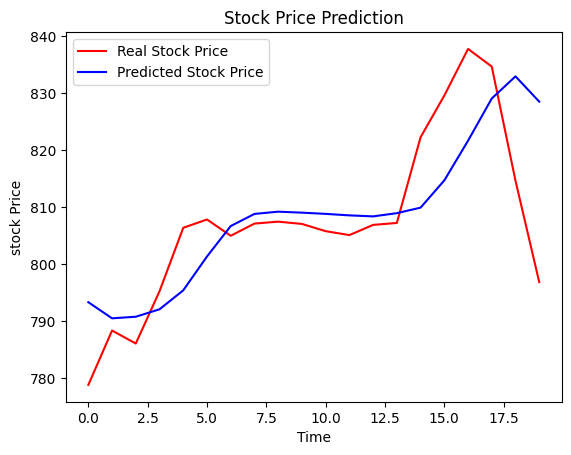

In [ ]:
plt.plot(real_set, color = "red", label = "Real Stock Price")
plt.plot(stock_prediction, color = "blue",label = "Predicted Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("stock Price")
plt.legend()
plt.show()